Notebook to analysze MCMC outputs

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import invgamma
import datetime
import scipy
import importlib
import os, sys
sys.path.insert(0, 'C:/Users/User/Code/MMDGraph')
import Gibbs
import seaborn as sns
import tqdm
import pymc3 as pm3
from collections import defaultdict

Load mcmc data

In [22]:
# Gibbs_out_raw = pd.read_pickle("../data/Gibbs_pair/Industrials/GWW_ALLE/loose_5_10000.pkl")
#Gibbs_out_raw = pd.read_pickle("../data/Gibbs_pair/Industrials/GWW_ALLE_test_variance_30000_netter_start.pkl")
Gibbs_out_raw = pd.read_pickle("../data/Gibbs_pair/Industrials/GWW_ALLE_test_variance_50000_wishart.pkl")

Run the code below if Gibbs_out_raw is not in a chain form (A chain form is a dictionary where index is chain number 1 and its items is another dicationary with the samples)

In [23]:
chains = dict()
chains[0] = Gibbs_out_raw

else set chains as Gibbs_out_raw

In [4]:
# chains = Gibbs_out_raw


The gibbs sampler does not return the data in a optimal way

In [24]:
burnin = 2000

step = 20
# combine chains with thinning
v1 = np.hstack([ chains[i]['v'][burnin::step,0] for i in range(len(chains))])
v2 = np.hstack([ chains[i]['v'][burnin::step,1] for i in range(len(chains))])
w11 =np.hstack([ chains[i]['w'][burnin::step,0,0] for i in range(len(chains))])
w22 =np.hstack([ chains[i]['w'][burnin::step,1,1] for i in range(len(chains))])
w12 =np.hstack([ chains[i]['w'][burnin::step,0,1] for i in range(len(chains))])
G11 = np.hstack([ chains[i]['G'][burnin::step,0,0] for i in range(len(chains))])
G22 = np.hstack([ chains[i]['G'][burnin::step,1,1] for i in range(len(chains))])
states = np.concatenate([ chains[i]['states'][5000::step,:] for i in range(len(chains))], axis = 0)


chains_for_gelman = defaultdict(dict)

for i in range(len(chains)):
    chains_for_gelman[i]['v1'] = chains[i]['v'][burnin::step,0]
    chains_for_gelman[i]['v2'] = chains[i]['v'][burnin::step,1]
    chains_for_gelman[i]['w11'] = chains[i]['w'][burnin::step,0,0]
    chains_for_gelman[i]['w22'] = chains[i]['w'][burnin::step,1,1]
    chains_for_gelman[i]['w12'] = chains[i]['w'][burnin::step,0,1]
    chains_for_gelman[i]['G11'] = chains[i]['G'][burnin::step,0,0]
    chains_for_gelman[i]['G22'] = chains[i]['G'][burnin::step,1,1]



geweke_dict = dict()
geweke_dict['v1'] = v1
geweke_dict['v2'] = v2
geweke_dict['w11'] = w11
geweke_dict['w22'] = w22
geweke_dict['w12'] = w12
geweke_dict['G22'] = G11
geweke_dict['G11'] = G22






# plot assumes a certain strucutre of a dictionary
Gibbs_out_all = dict()
v = np.zeros((v1.shape[0],2))
v[:,0] =v1
v[:,1] =v2
Gibbs_out_all['v'] = v
w = np.zeros((w11.shape[0],2,2))
w[:,0,0] =w11
w[:,1,1] =w22
w[:,0,1]=w12
w[:,1,0]=w12
Gibbs_out_all['w'] = w
G = np.zeros((v1.shape[0],2,2))
G[:,0,0] = G11
G[:,1,1] = G22
Gibbs_out_all['G'] = G
Gibbs_out_all['states'] = states




# Plot trace

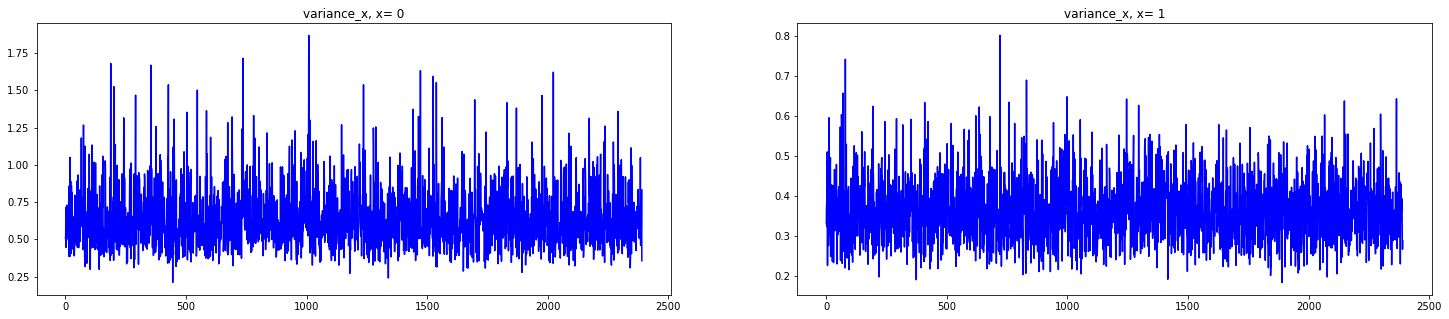

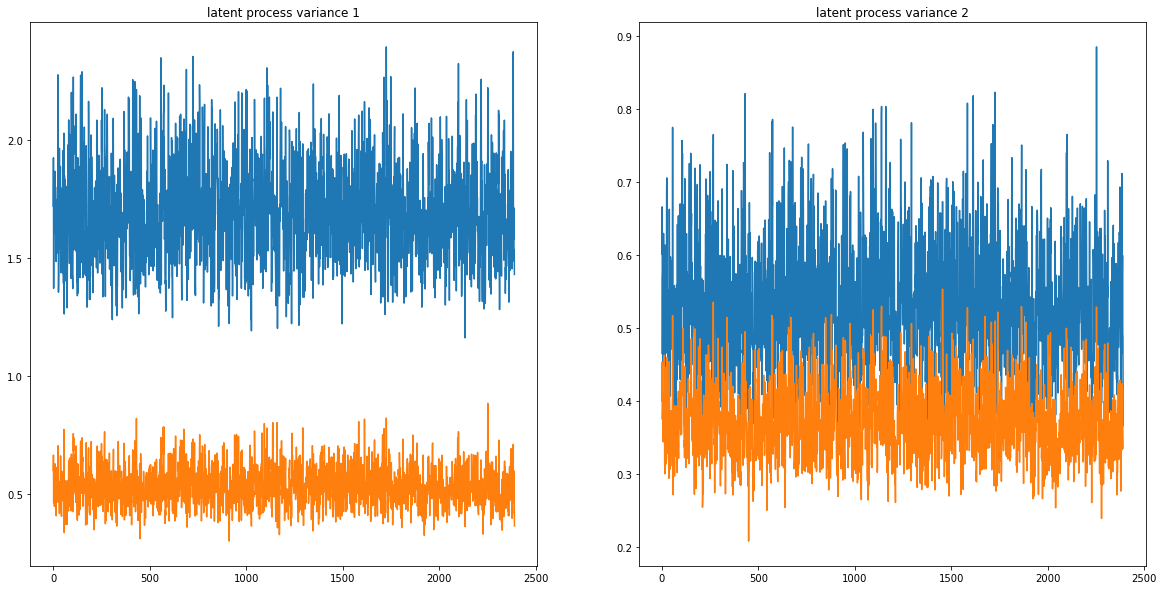

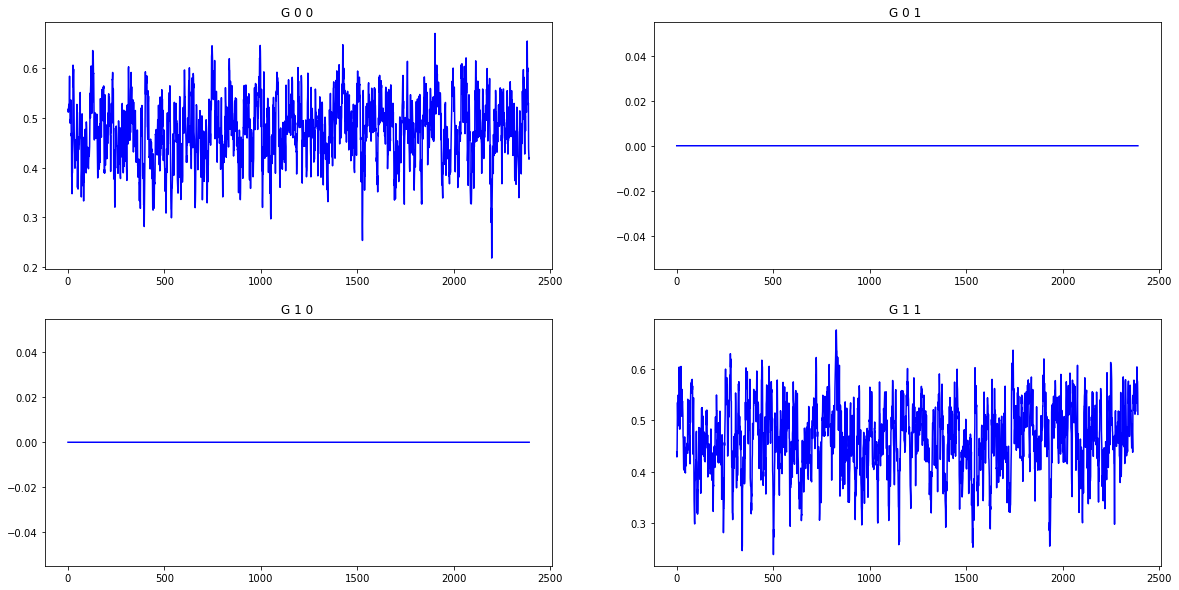

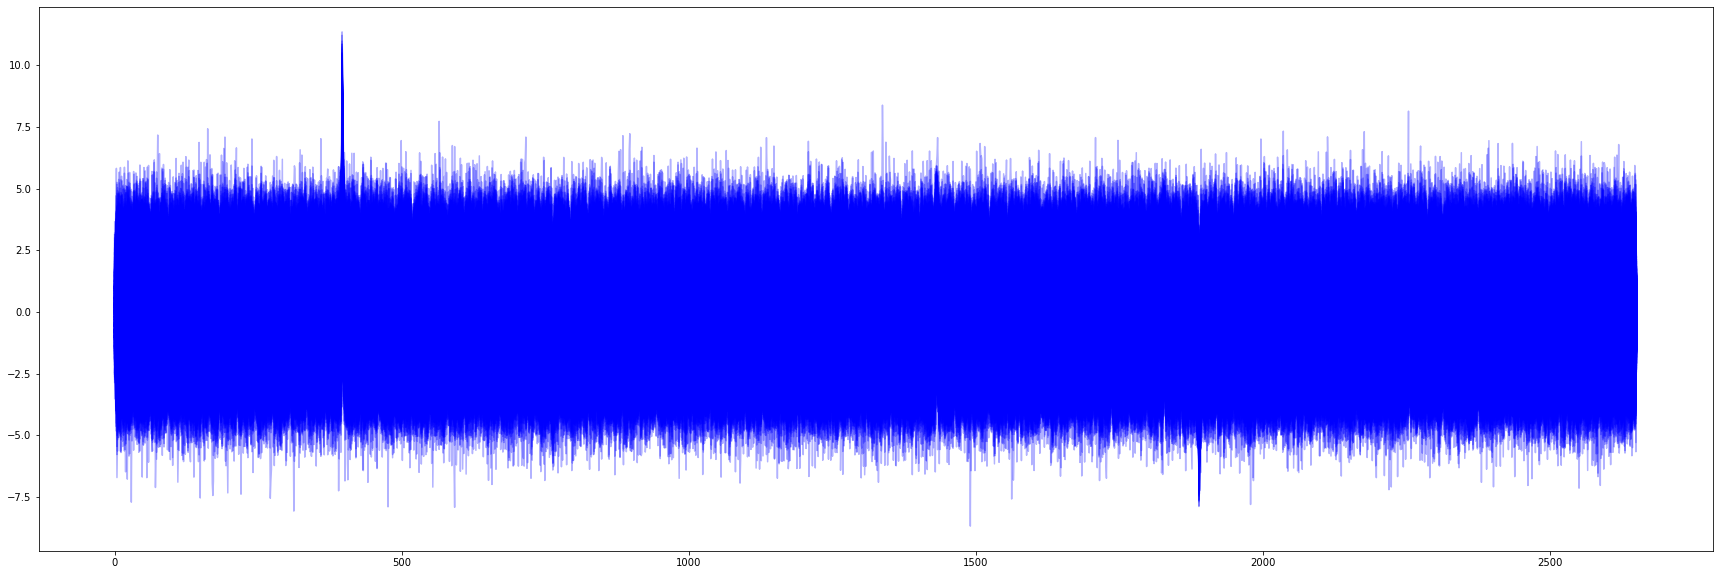

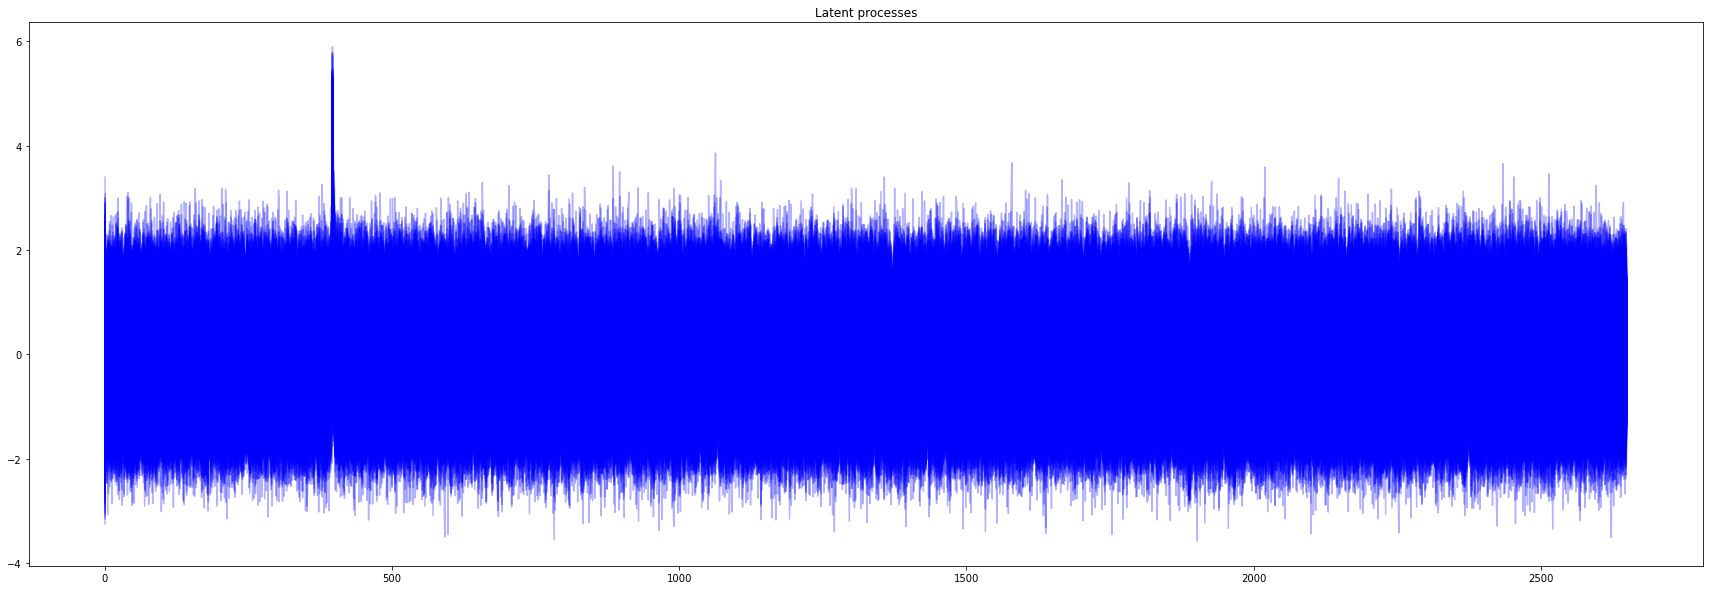

In [25]:
Gibbs.plot_gibbs_clean(Gibbs_out_all, state_from= 10)

# Effective sample size

v1:  7.842559301145618
v2:  3.8714147154887453
w11:  0.7471420717805933
w22:  0.7470209136984528
w12:  0.8484522368011017
G11:  0.1318522796375806
G22:  0.3272354893628659


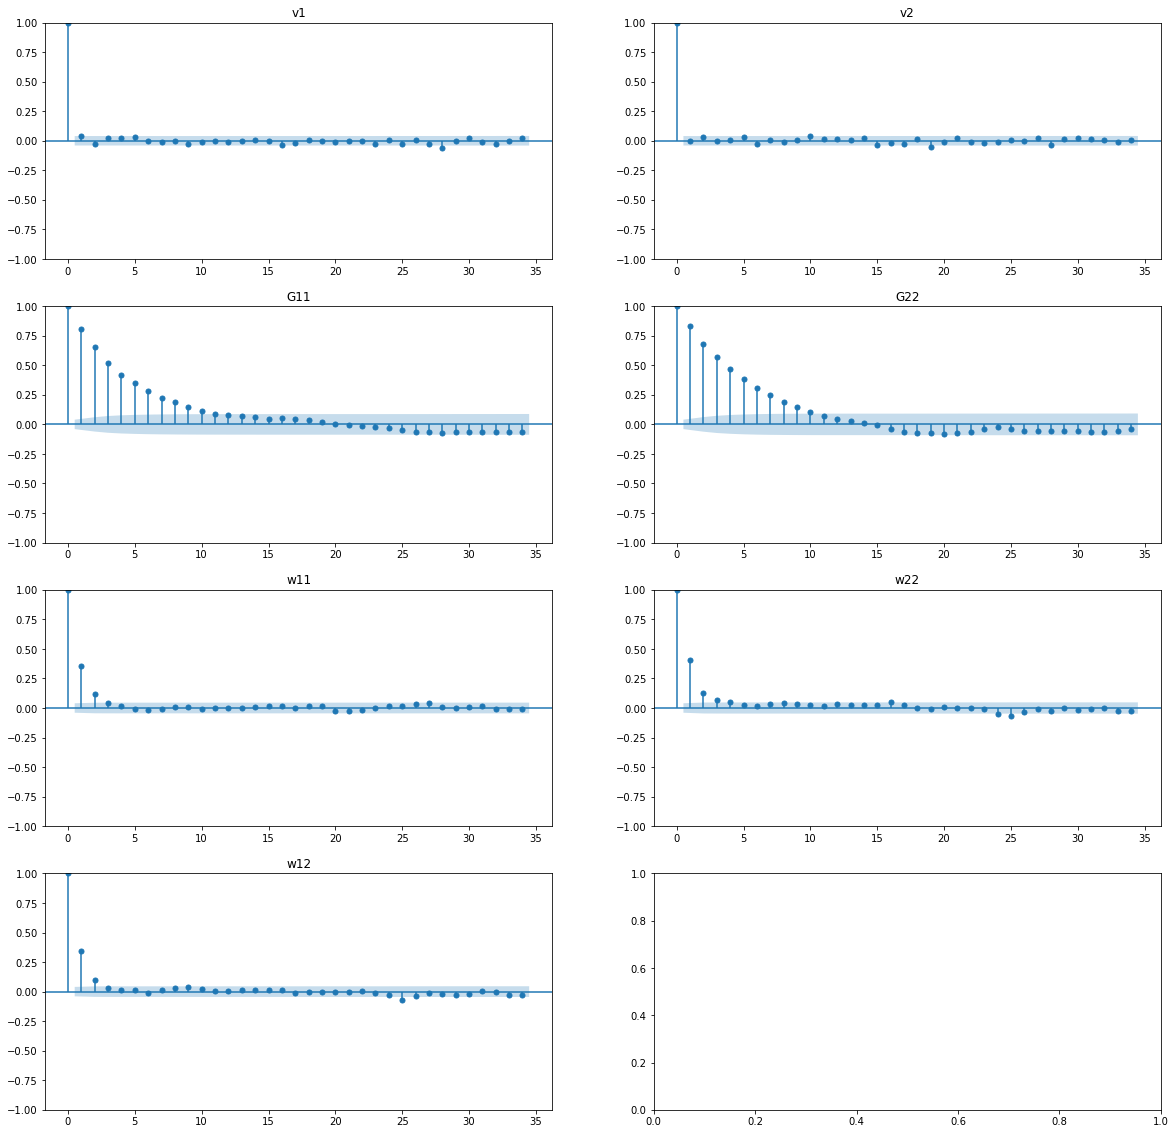

In [26]:
importlib.reload(sys.modules['Gibbs'])

N = len(v1)
# Effective sample size
print(f"v1:  {Gibbs.neff(v1, N)/N}")
print(f"v2:  {Gibbs.neff(v2, N)/N}")
print(f"w11:  {Gibbs.neff(w11, N)/N}")
print(f"w22:  {Gibbs.neff(w22, N)/N}")
print(f"w12:  {Gibbs.neff(w12, N)/N}")
print(f"G11:  {Gibbs.neff(G11, N)/N}")
print(f"G22:  {Gibbs.neff(G22, N)/N}")

Gibbs.plot_acf(v1,v2,G11,G22,w11,w22,w12)

# Geweke

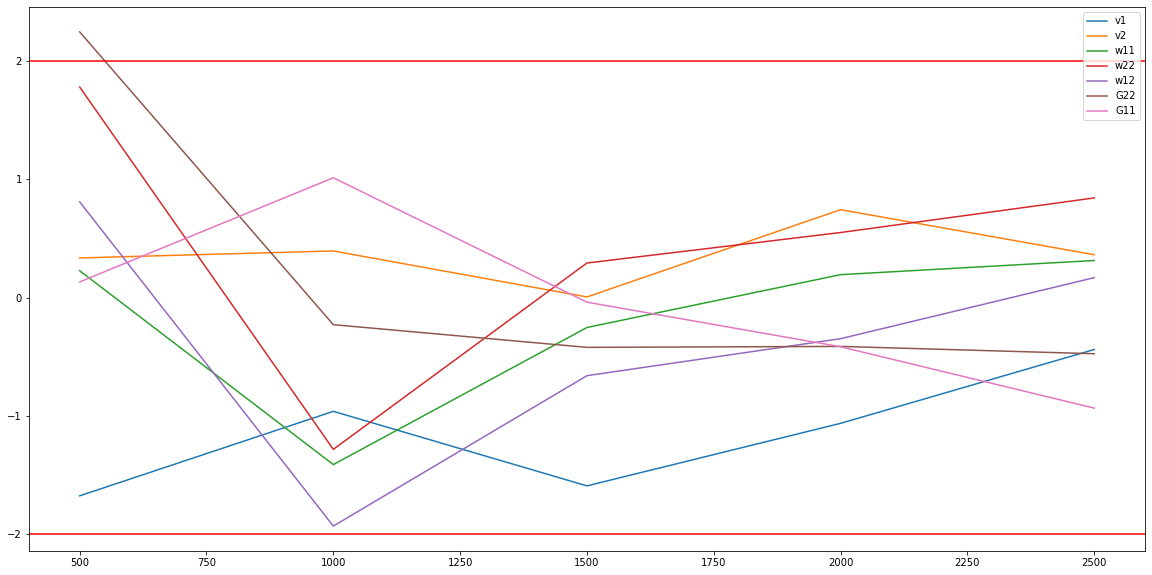

In [27]:
importlib.reload(sys.modules['Gibbs'])
start = 500
to = len(geweke_dict['v1']) + start
Gibbs.plot_geweke(geweke_dict, start = start, to = to, by = 500)

# Gelman-Rubin

In [16]:
importlib.reload(sys.modules['Gibbs'])
Gibbs.Gelman_rubin(chains_for_gelman, len(chains))


R for v1 is 0.9985656952296869
R for v2 is 0.9983328226455003
R for w11 is 1.0179347459972963
R for w22 is 1.0097616622705794
R for w12 is 1.0232876676411973
R for G11 is 1.1636036908084055


# Correlation Plot

In [31]:
states.shape

(2250, 2651, 2)

In [29]:
fig, ax = plt.subplots(3,1, figsize = (30,20))


pearson = []
kendall = []
spearman = []


for i in range(1,states.shape[1]]):
    pearson.append(np.corrcoef(states[:,i,0], states[:,i,1]])[0,1])
    kendall.append(scipy.stats.spearmanr(states[:,i,0], states[:,i,1]])[0])
    spearman.append(scipy.stats.kendalltau(states[:,i,0], states[:,i,1])[0])

ax[0].plot(ok)
ax[0].set_title("Correlation")

y1mask = np.isfinite(y_obs[:,0])
y2mask = np.isfinite(y_obs[:,1])
ymask = y1mask & y2mask

for i in range(y_obs.shape[0]):
    

    if ymask[i]:
        ax[0].axvline(x = i, color = 'b', alpha = 0.3)


ax[1].scatter(range(y_obs.shape[0]), y_obs[:,0], alpha = 0.5)
ax[1].scatter(range(y_obs.shape[0]), y_obs[:,1], alpha = 0.5)
ax[1].set_title(f'Observations')
#ax[2].scatter(states_gibbs_pair[500:,609, 0], states_gibbs_pair[500:,609, 1])